<a href="https://colab.research.google.com/github/Leop250/Machine_learning/blob/main/projet_fin_de_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
import pandas as pd  # Lecture d'un fichier CSV
import numpy as np  # Op√©rations math√©matiques
import seaborn as sns  # Graphiques tels que la matrice de corr√©lation
import matplotlib.pyplot as plt  # Pour l'affichage des graphiques
from sklearn.model_selection import train_test_split  # Pour s√©parer le jeu de donn√©es
from sklearn.linear_model import LinearRegression  # Pour effectuer la r√©gression lin√©aire
from sklearn import metrics  # Utilis√© pour calculer des m√©triques telles que l'accuracy
from sklearn.model_selection import cross_val_score  # Pour calculer la cross-validation
from sklearn.preprocessing import StandardScaler  # Utiliser l'objet StandardScaler
from sklearn.neighbors import KNeighborsClassifier  # Utilis√© pour le mod√®le KNN


Dans cette partie du code nous importons les bibloth√®ques n√©ssecaire

## Lecture du fichier

In [ ]:
df = pd.read_csv('bienetre.csv')  # Ici, nous importons le fichier CSV
df_scaled = df.copy()  # Nous cr√©ons une copie du fichier afin de faire des tests et modifications
df_scaled.drop('target', inplace=True, axis=1)  # Nous retirons la colonne target (colonne solution)
print(df_scaled.head())  # Nous v√©rifions que la colonne target a bien √©t√© retir√©e


         age      taille      poids       revenu  experience  education  \
0  76.378818  172.472900  93.637574  2317.284189   23.187146   2.524067   
1  39.629339  162.527782  88.071856  2740.909189   26.742305   3.136856   
2  36.506832  196.457696  85.160759  3541.036636   20.895824   4.282662   
3  50.016190  174.829299  72.362368  3093.794975   26.155986   3.007974   
4  60.743330  171.536491  54.874865  2113.805284   14.771488   2.780533   

         imc    stress  nb_enfants     depenses  exercice  alimentation  \
0  24.544095  5.805570         1.0  1429.244924       4.0      6.128322   
1  26.805875  3.970287         1.0  1694.538136       1.0      6.068320   
2  24.218407  2.312967         0.0  3094.685811       3.0      6.503321   
3  23.452811  5.387465         0.0  1344.690334       3.0      6.015851   
4  26.065223  6.859302         1.0  1626.714555       3.0      5.344601   

    sommeil    pression  cholesterol  activite  satisfaction     risque  \
0  7.656376  129.058650

Pour resumer dans cette partie Nous importons le fichier CSV et l'affichons pour valider son importation apr√®s les modifications importer


## Afficher la matrice de convolution

### Normalisation Standard

---



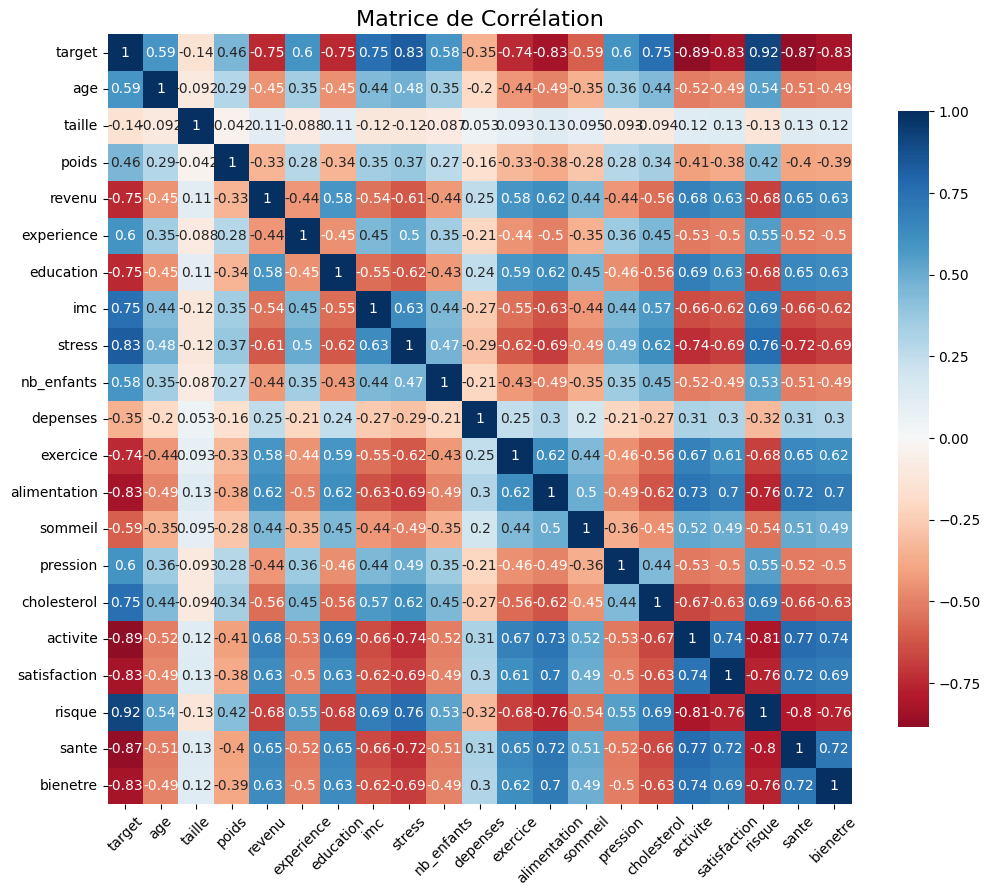

In [ ]:
correlation_matrix = df.corr()  # Nous initialisons la matrice de corr√©lation avec le fichier df

plt.figure(figsize=(12, 10))  # Nous d√©finissons la taille de la matrice
sns.heatmap(correlation_matrix, annot=True, center=0, cmap='RdBu', cbar_kws={"shrink": .8})
# Gr√¢ce √† Seaborn, nous cr√©ons la matrice de corr√©lation

plt.title('Matrice de Corr√©lation', fontsize=16)  # Ajout d'un titre
plt.xticks(rotation=45)  # Configuration de l'axe X
plt.yticks(rotation=0)  # Configuration de l'axe Y
plt.show()  # Affichage de la matrice


In [ ]:
df.describe() #nous ananlyson les donn√©es du fichier

target           age        taille         poids        revenu  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.800000     47.978640    170.535341     74.042819   2796.214262   
std        0.748369     12.457695     10.114769     13.341103    781.533488   
min        0.000000      7.587327    129.436247     31.449135    275.978543   
25%        0.000000     39.405573    163.740683     64.729830   2204.563230   
50%        1.000000     47.619796    170.490729     73.192735   2757.064229   
75%        1.000000     56.637883    177.275880     82.251508   3381.817122   
max        2.000000     93.773829    214.790843    140.374368   5363.916672   

         experience     education           imc        stress    nb_enfants  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      19.032658      3.299494     25.621232      4.598669      1.836000   
std        6.242550      0.779620      3.380089      1.807880      1.217396   
min       -6.476955      1.000000     16.595884     -0.817043      0.000000   
25%       14.697224      2.718558     23.240084      3.197705      1.000000   
50%       18.971618      3.278090     25.314537      4.489886      2.000000   
75%       23.292222      3.890786     27.579416      5.882468      3.000000   
max       40.327629      5.000000     40.608144     10.605591      7.000000   

       ...      exercice  alimentation       sommeil      pression  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...      2.626100      6.402255      7.195132    123.047003   
std    ...      1.543353      1.804730      1.231426     12.549389   
min    ...      0.000000      1.000000      2.773131     79.364067   
25%    ...      1.000000      5.101108      6.369437    114.360830   
50%    ...      3.000000      6.502440      7.214413    122.755603   
75%    ...      4.000000      7.805253      8.051258    131.595146   
max    ...      8.000000     10.000000     11.331989    167.334076   

        cholesterol      activite  satisfaction        risque         sante  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     204.035817      5.796017      6.393817     44.145412     73.824255   
std       30.366382      2.163302      1.789406     24.605016     17.215520   
min      113.800424      1.000000      1.000000      0.000000     16.932014   
25%      181.995873      4.113038      5.129324     23.080978     60.948984   
50%      202.548092      5.651046      6.484931     43.577995     76.565336   
75%      225.125376      7.684186      7.766372     60.885159     88.778946   
max      305.815869     10.000000     10.000000    100.000000    100.000000   

           bienetre  
count  10000.000000  
mean       6.402144  
std        1.797726  
min        0.699666  
25%        5.114500  
50%        6.499488  
75%        7.787756  
max       10.000000  

[8 rows x 21 columns]

In [ ]:
scaler = StandardScaler()  # Initialisation de l'objet StandardScaler, il sert √† normaliser les donn√©es
X_scaled = scaler.fit_transform(df_scaled)  # Application du scaler sur le fichier df_scaled
X_scaled = pd.DataFrame(X_scaled, columns=df_scaled.columns)  # Nous transformons le fichier en DataFrame
X_scaled.head()  # Nous v√©rifions que X_scaled a bien fonctionn√©

df_scaled = X_scaled.copy()  # Cr√©ation d'une copie du fichier normalis√©
df_scaled['target'] = df['target']  # Ajout de la colonne 'target' originale
df_scaled.head()  # V√©rification que la colonne 'target' est bien ajout√©e


age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...  alimentation   sommeil  pression  \
0  0.667612   -0.686746 -0.727963  ...     -0.151793  0.374580  0.479063   
1 -0.347597   -0.686746 -0.230451  ...     -0.185042 -1.701328 -0.160035   
2 -1.264363   -1.508213  2.395286  ...      0.056003  0.696785 -1.179145   
3  0.436332   -1.508213 -0.886530  ...     -0.214117 -1.049163  0.141935   
4  1.250496   -0.686746 -0.357642  ...     -0.586075 -0.728784 -0.444839   

   cholesterol  activite  satisfaction    risque     sante  bienetre  target  
0     0.822289 -0.606725      0.180294  0.075670 -0.161065 -0.874886       1  
1     1.288805 -0.410068     -0.932284 -0.051405 -0.518374 -0.226504       1  
2     2.213298  0.558314      1.390604 -0.853248  0.774877  0.957294       0  
3     0.509582 -0.566711     -0.447901  0.295409 -0.089794 -0.042210       1  
4     0.679923 -0.300729     -0.688234  0.137607 -0.086171 -1.061694       1  

[5 rows x 21 columns]

In [ ]:
print(df_scaled.head())

        age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...  alimentation   sommeil  pression  \
0  0.667612   -0.686746 -0.727963  ...     -0.151793  0.374580  0.479063   
1 -0.347597   -0.686746 -0.230451  ...     -0.185042 -1.701328 -0.160035   
2 -1.264363   -1.508213  2.395286  ...      0.056003  0.696785 -1.179145   
3  0.436332   -1.508213 -0.886530  ...     -0.214117 -1.049163  0.141935   
4  1.250496   -0.686746 -0.357642  ...     -0.586075 -0.728784 -0.444839   

   cholesterol  activite  satisfaction    risque     sante  bienetre  targ

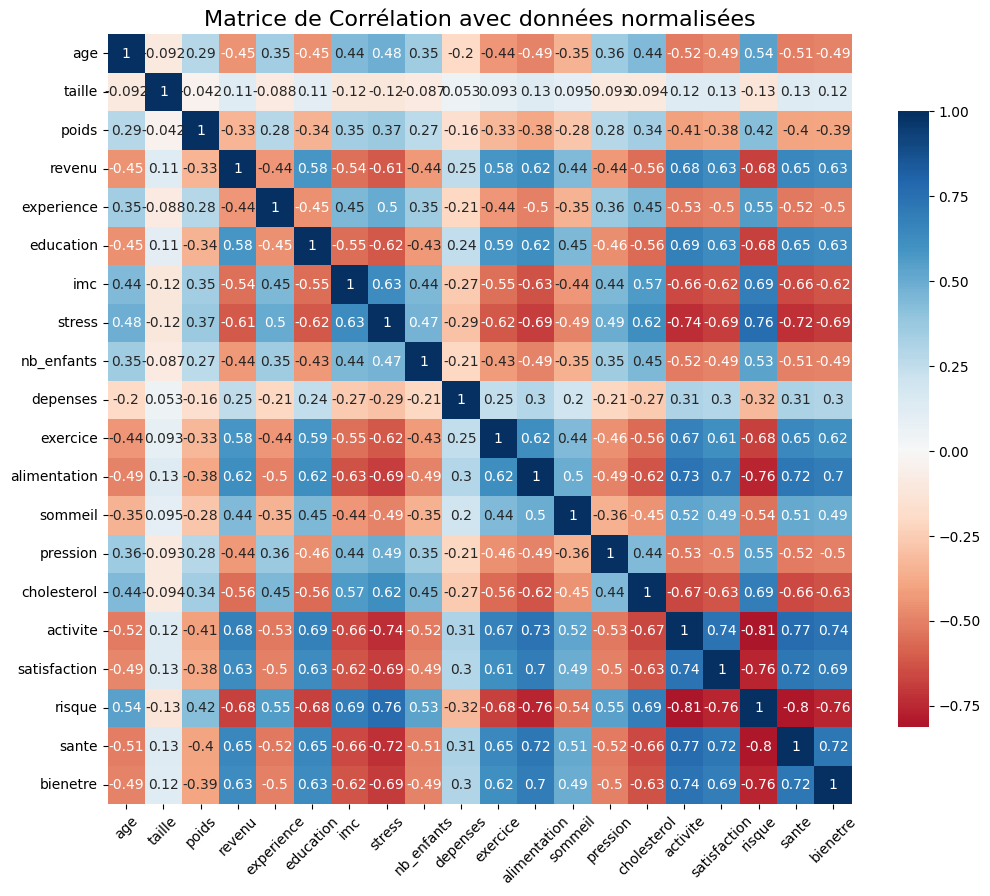

In [ ]:
correlation_matrix = X_scaled.corr()  # Nous faisons la m√™me matrice de corr√©lation, mais avec les donn√©es normalis√©es

plt.figure(figsize=(12, 10))  # Nous d√©finissons les dimensions
sns.heatmap(correlation_matrix, annot=True, center=0, cmap='RdBu', cbar_kws={"shrink": .8})
# Nous cr√©ons la matrice avec les param√®tres √† l'aide de Seaborn

plt.title('Matrice de Corr√©lation avec donn√©es normalis√©es', fontsize=16)  # Ajout d'un titre
plt.xticks(rotation=45)  # Configuration de l'axe des X
plt.yticks(rotation=0)  # Configuration de l'axe des Y
plt.show()  # Affichage de la matrice

Nous avons proc√©d√© √† plusieurs √©tapes :

*   Normalisation des donn√©es
*   Suppression, pour la suite du TP, de la colonne target
*  Affichage de la matrice de corr√©lation pour identifier les colonnes les plus corr√©l√©es entre elles
*  DE plsu nous remarquons que avec les donn√©es normaliser nous gardons le presque les mme correlation entre les colonnes que non normalis√©
:



### PCA

In [ ]:
from sklearn.decomposition import PCA #Importation de la PCA

In [ ]:
pca = PCA()  # Nous cr√©ons l'objet PCA
pca.fit(X_scaled)  # Nous proc√©dons √† la PCA sur X_scaled
explained_variance_ratio = pca.explained_variance_ratio_  # Nous affichons la variance de la PCA pour avoir une id√©e de la corr√©lation du jeu de donn√©es
X_pca = pca.transform(X_scaled)  # Puis nous transformons le fichier √† l'aide de la PCA


In [ ]:
df_pca = pca.fit(df_scaled)  # Nous entra√Ænons la PCA
df_pca = pca.transform(df_scaled)  # Nous transformons la PCA sur le fichier df_scaled

print(df_scaled.head())  # Nous affichons le fichier df_scaled


        age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...  alimentation   sommeil  pression  \
0  0.667612   -0.686746 -0.727963  ...     -0.151793  0.374580  0.479063   
1 -0.347597   -0.686746 -0.230451  ...     -0.185042 -1.701328 -0.160035   
2 -1.264363   -1.508213  2.395286  ...      0.056003  0.696785 -1.179145   
3  0.436332   -1.508213 -0.886530  ...     -0.214117 -1.049163  0.141935   
4  1.250496   -0.686746 -0.357642  ...     -0.586075 -0.728784 -0.444839   

   cholesterol  activite  satisfaction    risque     sante  bienetre  targ

üìí  Nous avons proc√©d√© √† la PCA, mais qu'est-ce que c'est et √† quoi cela sert ? La PCA (Analyse en Composantes Principales) est un algorithme qui va r√©duire les donn√©es, les compresser, afin de r√©duire la dimensionnalit√© tout en conservant autant d'information que possible. Cela permet d'avoir des mod√®les qui fonctionnent de mani√®re plus rapide.

In [ ]:
print(pca.explained_variance_ratio_)  # Nous affichons les diff√©rentes valeurs de la PCA, telles que la variance
print(pca.explained_variance_ratio_.cumsum())  # Nous affichons la somme cumulative de la variance expliqu√©e
print(pca.explained_variance_ratio_)  # Affichage des valeurs de la variance expliqu√©e de nouveau

[0.53565264 0.04781922 0.04266001 0.037956   0.03201033 0.03182289
 0.03134011 0.03087156 0.02951455 0.02340206 0.02100827 0.02037142
 0.02011083 0.01830587 0.0151754  0.01497781 0.01435587 0.0125585
 0.01087435 0.00840122 0.0008111 ]
[0.53565264 0.58347186 0.62613187 0.66408787 0.6960982  0.72792109
 0.75926121 0.79013277 0.81964732 0.84304938 0.86405764 0.88442907
 0.90453989 0.92284576 0.93802116 0.95299897 0.96735484 0.97991334
 0.99078768 0.9991889  1.        ]
[0.53565264 0.04781922 0.04266001 0.037956   0.03201033 0.03182289
 0.03134011 0.03087156 0.02951455 0.02340206 0.02100827 0.02037142
 0.02011083 0.01830587 0.0151754  0.01497781 0.01435587 0.0125585
 0.01087435 0.00840122 0.0008111 ]


Nous allons enssemble analyser le resutat que nous avons obtenue.

Ceci indique selon les component le pourcentage d'informatuion que cela represente:

*   La premi√®re composante principale explique 53.57 % de la variance
*   la deuxi√®me 4.78 %
*   la troisi√®me 4.27 %



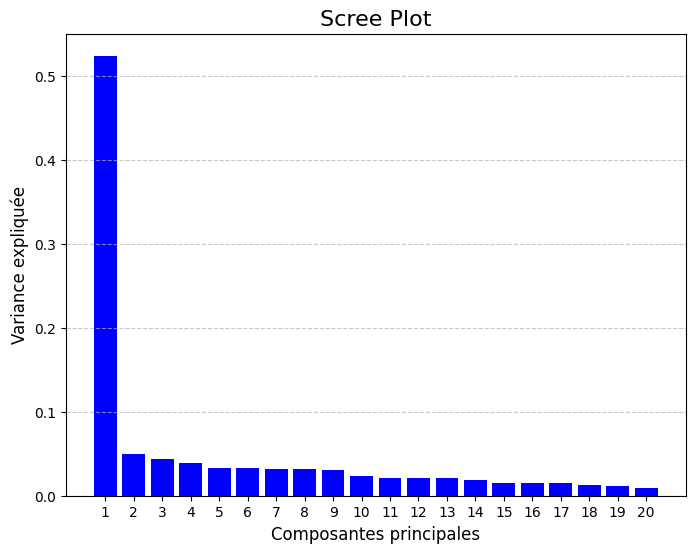

In [ ]:
plt.figure(figsize=(8, 6))  # Configuration de la taille du graphique
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, linewidth=2, color='blue')  # Cr√©ation du graphique
plt.title('Scree Plot', fontsize=16)  # Nous cr√©ons un titre pour le graphique
plt.xlabel('Composantes principales', fontsize=12)  # Cr√©ation d'un titre pour l'axe des X
plt.ylabel('Variance expliqu√©e', fontsize=12)  # Cr√©ation d'un titre pour l'axe des Y
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Configuration des graduations sur l'axe des X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout d'une grille sur l'axe Y
plt.show()  # Affichage du graphique



####Comment anamyser ce graphique ?

Par exemple, ici nous avons r√©duit la PCA, et avec une seule composante, nous avons plus de 50 % des informations du dataset. Ceci n'est pas √©norme compar√© √† d'autres dataset o√π, parfois, nous pouvons atteindre 80 % d'information avec seulement deux composantes.


Par exemple pour avoir 95% de l'information du dataset nous besoins de 16 component

### Graph 2D/3D

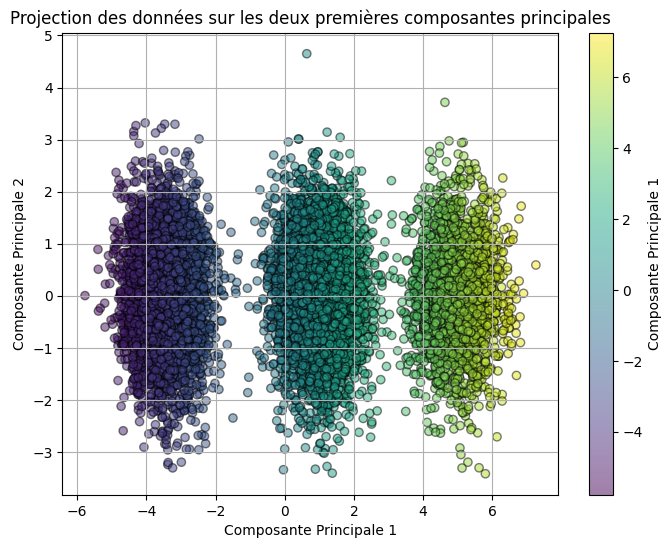

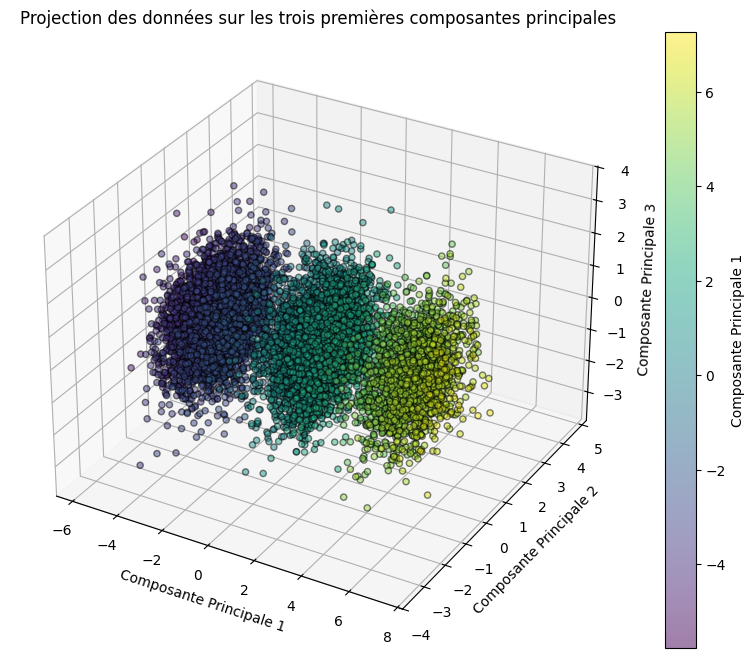

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Import de la librairie qui permet de faire l'axe en 2D et 3D
import matplotlib.pyplot as plt  # Librairie utilis√©e pour afficher des graphiques

# Pour le graphique en 2D avec couleur
plt.figure(figsize=(8, 6))  # Configuration de la taille du graphique
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c=X_pca[:, 0], cmap='viridis', edgecolors='k')  # Configuration du graphique
plt.xlabel('Composante Principale 1')  # Titre pour l'axe des X
plt.ylabel('Composante Principale 2')  # Titre pour l'axe des Y
plt.title('Projection des donn√©es sur les deux premi√®res composantes principales')  # Ajout d'un titre
plt.colorbar(label='Composante Principale 1')  # Ajout d'un titre √† la l√©gende
plt.grid()  # Ajout d'une grille
plt.show()  # Affichage du graphique

# Pour le graphique en 3D avec couleur
fig = plt.figure(figsize=(10, 8))  # Configuration de la taille du graphique
ax = fig.add_subplot(111, projection='3d')  # Graphique en 3D
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, c=X_pca[:, 0], cmap='viridis', edgecolors='k')  # Configuration des param√®tres du graphique
ax.set_xlabel('Composante Principale 1')  # Ajout d'un titre √† l'axe X
ax.set_ylabel('Composante Principale 2')  # Ajout d'un titre √† l'axe des Y
ax.set_zlabel('Composante Principale 3')  # Ajout d'un titre √† l'axe des Z
ax.set_title('Projection des donn√©es sur les trois premi√®res composantes principales')  # Ajout d'un titre au graphique
plt.colorbar(sc, label='Composante Principale 1')  # Ajout d'un titre √† la l√©gende
plt.show()  # Affichage du graphique



### Validit√© des donn√©e de la PCA EN 2D et 3D

In [ ]:
pca_2d = PCA(n_components=2)  # Configuration de la PCA 2D
X_pca_2d = pca_2d.fit_transform(X_scaled)  # Nous d√©finissons ici une variable pour stocker la PCA 2D

pca_3d = PCA(n_components=3)  # Configuration de la PCA 3D
X_pca_3d = pca_3d.fit_transform(X_scaled)  # Nous d√©finissons ici une variable pour stocker la PCA 3D


Nous avons affich√© les PCA en 2D et 3D. Celles-ci sont bien distinguables, ce qui pourrait conduire √† une accuracy de 1 dans les prochains mod√®les, ce qui est normalement impossible.

## k-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

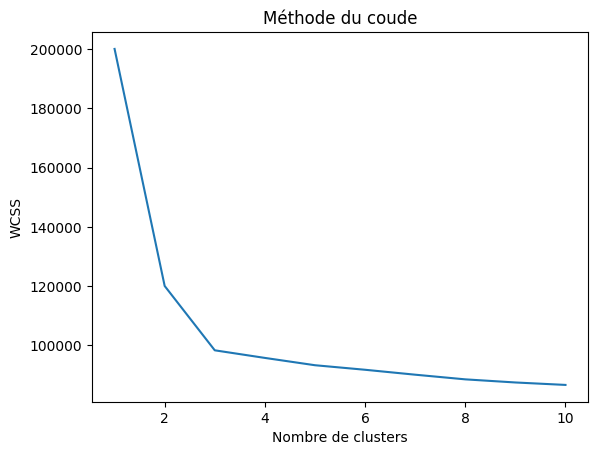

In [ ]:
from sklearn.cluster import KMeans  # Importation de la classe KMeans
wcss = []  # Liste pour stocker les valeurs de somme des carr√©s des distances intra-cluster

# Boucle pour tester le nombre de clusters de 1 √† 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Cr√©ation du mod√®le KMeans
    kmeans.fit(X_scaled)  # Entra√Ænement du mod√®le avec les donn√©es mises √† l'√©chelle
    wcss.append(kmeans.inertia_)  # Ajout de somme des carr√©s des distances intra-cluster  √† la liste

# Trac√© de la m√©thode du coude
plt.plot(range(1, 11), wcss)  # Affichage de l'inertie pour chaque nombre de clusters
plt.title('M√©thode du coude')  # Titre du graphique
plt.xlabel('Nombre de clusters')  # L√©gende de l'axe des X
plt.ylabel('WCSS')  # L√©gende de l'axe des Y (WCSS : Within-cluster sum of squares)
plt.show()  # Affichage du graphique


[1 1 0 ... 1 0 1]


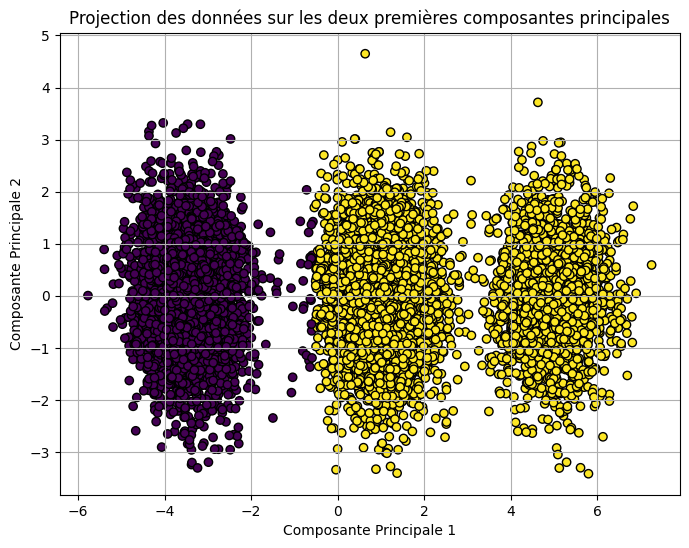

In [ ]:
kmeans = KMeans(n_clusters=2)  # Cr√©ation du mod√®le K-means
kmeans.fit(X_pca_2d)  # Entra√Æner le K-means sur la PCA 2D
labels = kmeans.labels_  # R√©cup√©ration des labels des clusters
print(labels)  # Affichage des labels

plt.figure(figsize=(8, 6))  # Cr√©ation du graphique avec la taille du graphique
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', edgecolors='k')  # Configuration des param√®tres du graphique
plt.xlabel('Composante Principale 1')  # Ajout d'un titre √† l'axe des X
plt.ylabel('Composante Principale 2')  # Ajout d'un titre √† l'axe des Y
plt.title('Projection des donn√©es sur les deux premi√®res composantes principales')  # Ajout d'un titre
plt.grid()  # Activation de la grille
plt.show()  # Affichage du graphique


[2 2 1 ... 2 1 2]


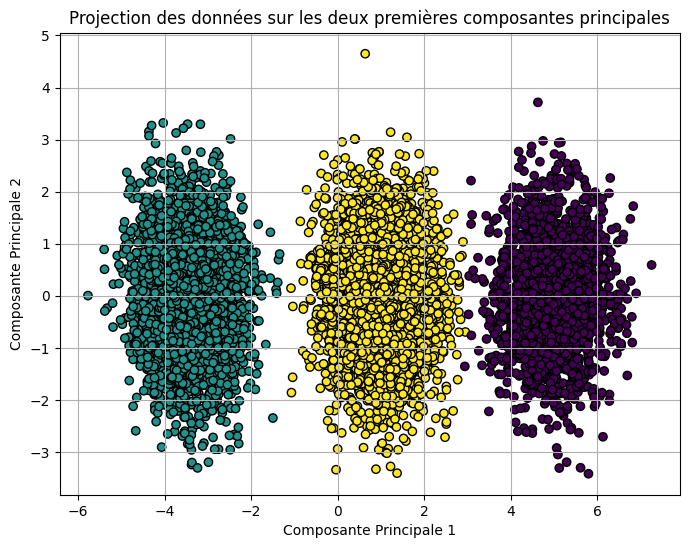

In [ ]:
kmeans = KMeans(n_clusters=3)  # Configuration du KMeans pour la PCA 3D
kmeans.fit(X_pca_3d)  # Entra√Æner le K-means sur la PCA en 3D
labels = kmeans.labels_  # R√©cup√©ration des labels des clusters
print(labels)  # Affichage des labels

plt.figure(figsize=(8, 6))  # Cr√©ation du graphique avec la taille du graphique
plt.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], c=labels, cmap='viridis', edgecolors='k')  # Configuration des param√®tres du graphique
plt.xlabel('Composante Principale 1')  # Ajout d'un titre √† l'axe des X
plt.ylabel('Composante Principale 2')  # Ajout d'un titre √† l'axe des Y
plt.title('Projection des donn√©es sur les deux premi√®res composantes principales')  # Ajout d'un titre
plt.grid()  # Activation de la grille
plt.show()  # Affichage du graphique


Nous avons un model de k-means mais qu'est ce que c'est ?


*   Le K-mean a un apprentissage non supervis√© et permet de classifier en cluster. Son but est de diviser un ensemble de donn√©es en groupes, il a un hyperparam√®tre.
*   L'algo affecte les points dans des groupes en fonction d'un calcul sur leur proximit√© avec leur centre, et ajuste les centres √† chaque it√©ration en fonction des points du groupe.




### Cross Validation + Logistic regression

In [ ]:
X = df_scaled  # On d√©finit dans X le fichier df_scaled
y = df['target']  # Attribution de la colonne solution √† y
model = LogisticRegression()  # Cr√©ation du mod√®le de r√©gression logistique
model.fit(X, y)  # Nous l'entra√Ænons pour pr√©dire la colonne y => Target
y_pred = model.predict(X)  # Il essaye de la pr√©dire avec X

scores_2D = cross_val_score(model, X_pca_2d, y, cv=5, scoring='accuracy')  # Validation sur les donn√©es projet√©es de la PCA 2D
print('Scores de validation crois√©e pour la PCA en 2D: ', scores_2D)  # Affichage des scores obtenus pour chaque it√©ration de la PCA 2D
print('Score moyen de validation crois√©e: ', scores_2D.mean())  # Score moyen sur la PCA 2D

scores_3D = cross_val_score(model, X_pca_3d, y, cv=5, scoring='accuracy')  # Validation sur les donn√©es projet√©es de la PCA 3D
print('Scores de validation crois√©e pour la PCA en 3D: ', scores_3D)  # Affichage des scores obtenus pour chaque it√©ration de la PCA 3D
print('Score moyen de validation crois√©e: ', scores_3D.mean())  # Score moyen sur la PCA 3D


Scores de validation crois√©e pour la PCA en 2D:  [0.999  0.9985 0.9975 0.9995 0.9985]
Score moyen de validation crois√©e:  0.9986
Scores de validation crois√©e pour la PCA en 3D:  [0.999  0.9985 0.9975 0.9995 0.9985]
Score moyen de validation crois√©e:  0.9986


Nous obtenons une tr√®s bonne accuracy de 99 % avec la PCA en 2D et 3D, ce qui signifie qu'il manque de bruit dans les donn√©es g√©n√©r√©es, car l'ajout d'une composante suppl√©mentaire ne parvient pas √† ajouter de mani√®re significative de l'information.

#### Logistic Regression nombre de composante nesssesaire **(n√©cessaire si L√©opold ne fait pas de fautes)** pour 95%


In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)  # Calcul de la somme cumulative de la variance expliqu√©e par les composantes principales
num_components = np.argmax(cumulative_variance >= 0.95) + 1  # Recherche du nombre de composantes n√©cessaires pour atteindre 95% de variance cumulative
print(f'Nombre de composantes n√©cessaires pour atteindre 95% de variance cumulative: {num_components}')  # Affichage du r√©sultat


Nombre de composantes n√©cessaires pour atteindre 95% de variance cumulative: 16


### ROC

In [ ]:
from sklearn.metrics import roc_curve, auc  # Librairies n√©cessaires pour la ROC
from sklearn.preprocessing import label_binarize  # Permet de convertir des labels multi-classes en un format binaire


In [ ]:
y_prob_3d = logistic_3d.predict_proba(X_pca_3d)  # Pr√©paration de la r√©gression logistique √† l'aide de la PCA 3D

for i in range(n_classes):  # Boucle qui va it√©rer selon le nombre de classes apr√®s la binarisation
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_3d[:, i])  # Calcul des taux de faux positifs et vrais positifs
    roc_auc = auc(fpr, tpr)  # Calcul de l'aire sous la courbe ROC
    plt.plot(fpr, tpr, label=f'PCA 3D - Classe {i} (AUC={roc_auc:.2f})')  # Permet de tracer la courbe

plt.plot([0, 1], [0, 1], 'k--')  # Permet de tracer la ligne diagonale repr√©sentant un classificateur al√©atoire
plt.xlabel('Taux F+ (FPR)')  # Nom de l'axe des X
plt.ylabel('Taux V+ (TPR)')  # Nom de l'axe des Y
plt.title('Courbes ROC PCA 3D (OvsR)')  # Titre du graphique
plt.legend()  # Affichage de la l√©gende
plt.grid()  # Ajout d'une grille sur le graphique
plt.show()  # Affichage du graphique



NameError: name 'logistic_3d' is not defined

Pourquoi la ROC est perpendiculaire avec une accuracy a 100% ‚ùì

Nous obtenons une courbe ROC perpendiculaire, indiquant une accuracy de 1 en raison du peu de bruit. De plus, lors de la visualisation de la PCA, nous pouvons bien distinguer les valeurs elles-m√™mes, sans chevauchement.


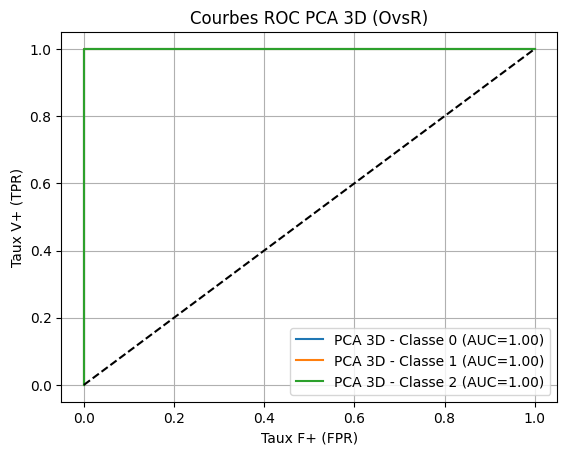

In [ ]:
from sklearn.metrics import roc_curve, auc  # Librairies n√©cessaires pour la courbe ROC
from sklearn.preprocessing import label_binarize  # Permet de convertir des labels en format binaire pour la classification multiclasse
from sklearn.linear_model import LogisticRegression  # Importation de LogisticRegression

logistic_3d = LogisticRegression()  # Cr√©ation d'un objet LogisticRegression
logistic_3d.fit(X_pca_3d, y)  # Entra√Ænement du mod√®le avec les donn√©es PCA 3D

y_prob_3d = logistic_3d.predict_proba(X_pca_3d)  # Pr√©paration de la r√©gression logistique √† l'aide de la PCA 3D

# Obtention du nombre de classes
n_classes = len(np.unique(y))

# Binarisation des labels
y_bin = label_binarize(y, classes=np.unique(y))
for i in range(n_classes):  # Boucle qui va it√©rer selon le nombre de classes apr√®s la binarisation
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_3d[:, i])  # Calcul des taux de faux positifs et vrais positifs
    roc_auc = auc(fpr, tpr)  # Calcul de l'aire sous la courbe ROC
    plt.plot(fpr, tpr, label=f'PCA 3D - Classe {i} (AUC={roc_auc:.2f})')  # Trac√© de la courbe ROC pour chaque classe

plt.plot([0, 1], [0, 1], 'k--')  # Trac√© de la ligne diagonale repr√©sentant un classificateur al√©atoire
plt.xlabel('Taux F+ (FPR)')  # Nom de l'axe des X
plt.ylabel('Taux V+ (TPR)')  # Nom de l'axe des Y
plt.title('Courbes ROC PCA 3D (OvsR)')  # Titre du graphique
plt.legend()  # Affichage de la l√©gende
plt.grid()  # Ajout d'une grille au graphique
plt.show()  # Affichage du graphique


### KNN

In [ ]:
from sklearn.model_selection import GridSearchCV  # Importation de GridSearchCV pour l'optimisation des hyperparam√®tres
from sklearn.neighbors import KNeighborsClassifier  # Importation du classificateur KNN

# D√©finition de la grille des hyperparam√®tres √† tester
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # Nombre de voisins, on choisit des nombres impairs pour √©viter les √©galit√©s
    'weights': ['uniform', 'distance'],  # Pond√©ration des voisins : 'uniform' ou 'distance'
    'metric': ['euclidean', 'manhattan', 'minkowski']  # M√©triques de distance : euclidienne, manhattan ou minkowski
}

# Cr√©ation du classificateur KNN
knn = KNeighborsClassifier()

# GridSearchCV pour la PCA en 2D
grid_search_2d = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # Optimisation des hyperparam√®tres pour PCA 2D
grid_search_2d.fit(X_pca_2d, y)  # Entrainement du mod√®le avec la PCA 2D

# Affichage des meilleurs r√©sultats pour la PCA 2D
print("Meilleurs param√®tres (PCA 2D) :", grid_search_2d.best_params_)
print("Meilleur score (PCA 2D) :", grid_search_2d.best_score_)

# GridSearchCV pour la PCA en 3D
grid_search_3d = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # Optimisation des hyperparam√®tres pour PCA 3D
grid_search_3d.fit(X_pca_3d, y)  # Entrainement du mod√®le avec la PCA 3D

# Affichage des meilleurs r√©sultats pour la PCA 3D
print("Meilleurs param√®tres (PCA 3D) :", grid_search_3d.best_params_)
print("Meilleur score (PCA 3D) :", grid_search_3d.best_score_)


Meilleurs param√®tres (PCA 2D) : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Meilleur score (PCA 2D) : 0.9989000000000001
Meilleurs param√®tres (PCA 3D) : {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Meilleur score (PCA 3D) : 0.999


Le Grid Search d√©fini ici dans le mod√®le permet √† un algorithme non supervis√© de d√©finir les meilleurs param√®tres pour entra√Æner le mod√®le afin d‚Äôobtenir la meilleure accuracy

---



#### D√©terminer le nombre de composantes n√©cessaires pour atteindre 95% de variance cumulative. avec le moddel KNN

In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Nombre de composantes n√©cessaires pour atteindre 95% de variance cumulative: {num_components}')

Nombre de composantes n√©cessaires pour atteindre 95% de variance cumulative: 16


###k-means

[0 0 1 ... 0 1 0]


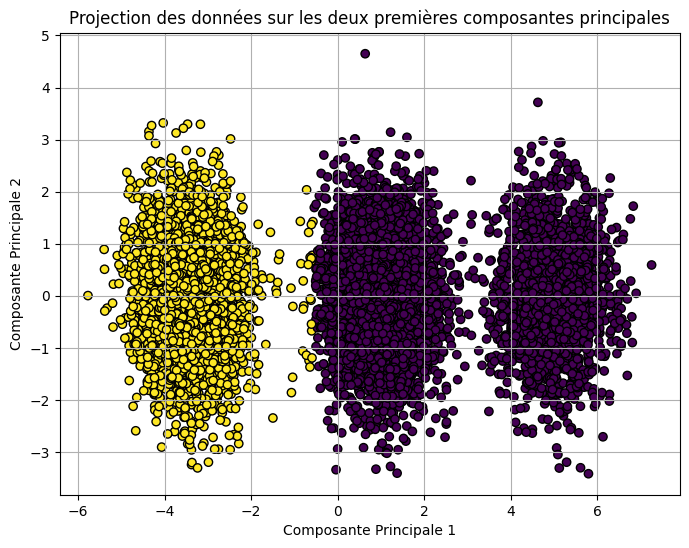

[1 1 0 ... 1 0 1]


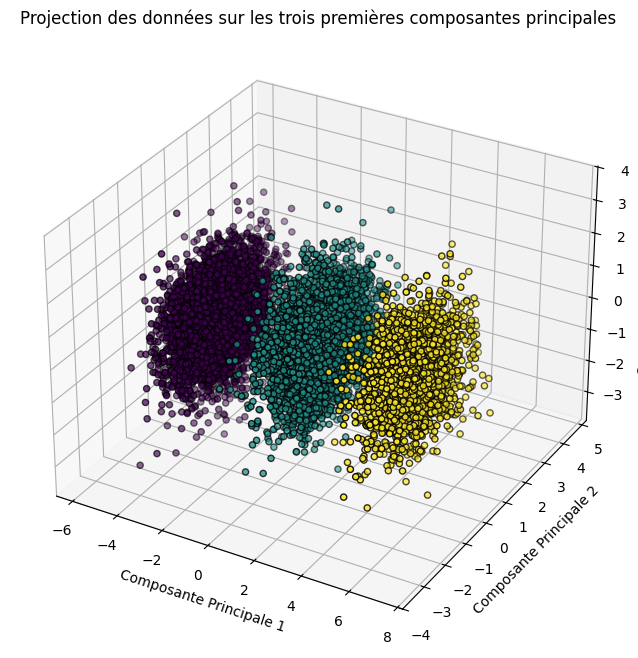

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca_2d)
labels = kmeans.labels_
print(labels)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des donn√©es sur les deux premi√®res composantes principales')
plt.grid()
plt.show()

# ----------------------------------------------------------------------------------------

kmeans_3D = KMeans(n_clusters=3)
kmeans_3D.fit(X_pca_3d)
labels = kmeans_3D.labels_
print(labels)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis', edgecolors='k')
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
ax.set_title('Projection des donn√©es sur les trois premi√®res composantes principales')
plt.show() #permet d'afficher le graphique



### R√©gression Logistic PCA 2D/3D

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Cr√©ation du mod√®le de r√©gression logistique pour la PCA 2D
logistic_2d = LogisticRegression()
logistic_2d.fit(X_pca_2d, y)  # Entra√Ænement du mod√®le avec les donn√©es PCA 2D
y_pred_2d = logistic_2d.predict(X_pca_2d)  # Pr√©diction avec la PCA 2D
accuracy_2d = metrics.accuracy_score(y, y_pred_2d)  # Calcul de l'accuracy du mod√®le avec la PCA 2D
print(f'Accuracy avec PCA 2D : {accuracy_2d:.4f}')  # Affichage de l'accuracy avec la PCA 2D

# Cr√©ation du mod√®le de r√©gression logistique pour la PCA 3D
logistic_3d = LogisticRegression()
logistic_3d.fit(X_pca_3d, y)  # Entra√Ænement du mod√®le avec les donn√©es PCA 3D
y_pred_3d = logistic_3d.predict(X_pca_3d)  # Pr√©diction avec la PCA 3D
accuracy_3d = metrics.accuracy_score(y, y_pred_3d)  # Calcul de l'accuracy du mod√®le avec la PCA 3D
print(f'Accuracy avec PCA 3D : {accuracy_3d:.4f}')  # Affichage de l'accuracy avec la PCA 3D


Accuracy avec PCA 2D : 0.9987
Accuracy avec PCA 3D : 0.9987


Nous avons fait un code de r√©gression logistique bas√© sur le mod√®le de la PCA en 2D et en 3D.

## KNN PCA 2D/3D

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Cr√©ation du mod√®le KNN avec la PCA 2D et 3D
knn = KNeighborsClassifier(n_neighbors=5)

# Validation crois√©e (5-fold) pour la PCA 2D
knn_scores_2d = cross_val_score(knn, X_pca_2d, y, cv=5, scoring='accuracy')
print('Scores de validation crois√©e avec KNN pour la PCA 2D :', knn_scores_2d)  # Calcul des scores pour la validation avec la PCA 2D
print('Score moyen de validation crois√©e avec KNN pour la PCA 2D :', knn_scores_2d.mean())  # Calcul du score moyen pour la PCA 2D

# Validation crois√©e (5-fold) pour la PCA 3D
knn_scores_3d = cross_val_score(knn, X_pca_3d, y, cv=5, scoring='accuracy')
print('Scores de validation crois√©e avec KNN pour la PCA 3D :', knn_scores_3d)  # Calcul des scores pour la validation avec la PCA 3D
print('Score moyen de validation crois√©e avec KNN pour la PCA 3D :', knn_scores_3d.mean())  # Calcul du score moyen pour la PCA 3D


Scores de validation crois√©e avec KNN pour la PCA 2D : [0.999  0.999  0.997  0.9995 0.999 ]
Score moyen de validation crois√©e avec KNN pour la PCA 2D : 0.9987
Scores de validation crois√©e avec KNN pour la PCA 3D : [0.9985 0.999  0.9975 0.9995 0.9995]
Score moyen de validation crois√©e avec KNN pour la PCA 3D : 0.9988000000000001


Nous avons fait un code de KNN bas√© sur le mod√®le de la PCA en 2D et en 3D.




Le K-Nearest Neighbors (KNN) est un algorithme de classification simple et intuitif.
Il est bas√© sur le principe de proximit√© : un objet est class√© en fonction de la majorit√© des classes de ses K voisins les plus proches.



In [ ]:
df_scaled_dataframe = pd.DataFrame(df_scaled)  # Je transforme mon df_scaled en un DataFrame pour pouvoir l'utiliser dans un arbre de d√©cision
print(df_scaled_dataframe.head())  # V√©rification pour voir si cela a bien fonctionn√©
print(df_scaled_dataframe["target"].head())  # V√©rification de la pr√©sence de la colonne 'target' dans le DataFrame


        age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...  alimentation   sommeil  pression  \
0  0.667612   -0.686746 -0.727963  ...     -0.151793  0.374580  0.479063   
1 -0.347597   -0.686746 -0.230451  ...     -0.185042 -1.701328 -0.160035   
2 -1.264363   -1.508213  2.395286  ...      0.056003  0.696785 -1.179145   
3  0.436332   -1.508213 -0.886530  ...     -0.214117 -1.049163  0.141935   
4  1.250496   -0.686746 -0.357642  ...     -0.586075 -0.728784 -0.444839   

   cholesterol  activite  satisfaction    risque     sante  bienetre  targ

##Arbre de d√©cision

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

# Cr√©ation des classificateurs pour PCA 2D et 3D
clf_2d = DecisionTreeClassifier(random_state=42)
clf_3d = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],  # Profondeur de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'√©chantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4]     # Nombre minimum d'√©chantillons pour un noeud terminal
}

# GridSearch pour PCA 2D
grid_search_2d = GridSearchCV(clf_2d, param_grid, cv=5, scoring='accuracy')
grid_search_2d.fit(X_pca_2d, y)

# R√©sultats du GridSearch pour PCA 2D
print("Meilleur choix PCA 2D :", grid_search_2d.best_params_)
print("Meilleur score PCA 2D:", grid_search_2d.best_score_)

# GridSearch pour PCA 3D
grid_search_3d = GridSearchCV(clf_3d, param_grid, cv=5, scoring='accuracy')
grid_search_3d.fit(X_pca_3d, y)

# R√©sultats du GridSearch pour PCA 3D
print("Meilleur choix PCA 3D:", grid_search_3d.best_params_)
print("Meilleur score PCA 3D:", grid_search_3d.best_score_)

# R√©cup√©ration des meilleurs mod√®les
best_clf_2d = grid_search_2d.best_estimator_
best_clf_3d = grid_search_3d.best_estimator_


Meilleur choix PCA 2D : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleur score PCA 2D: 0.9987999999999999
Meilleur choix PCA 3D: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleur score PCA 3D: 0.9987999999999999


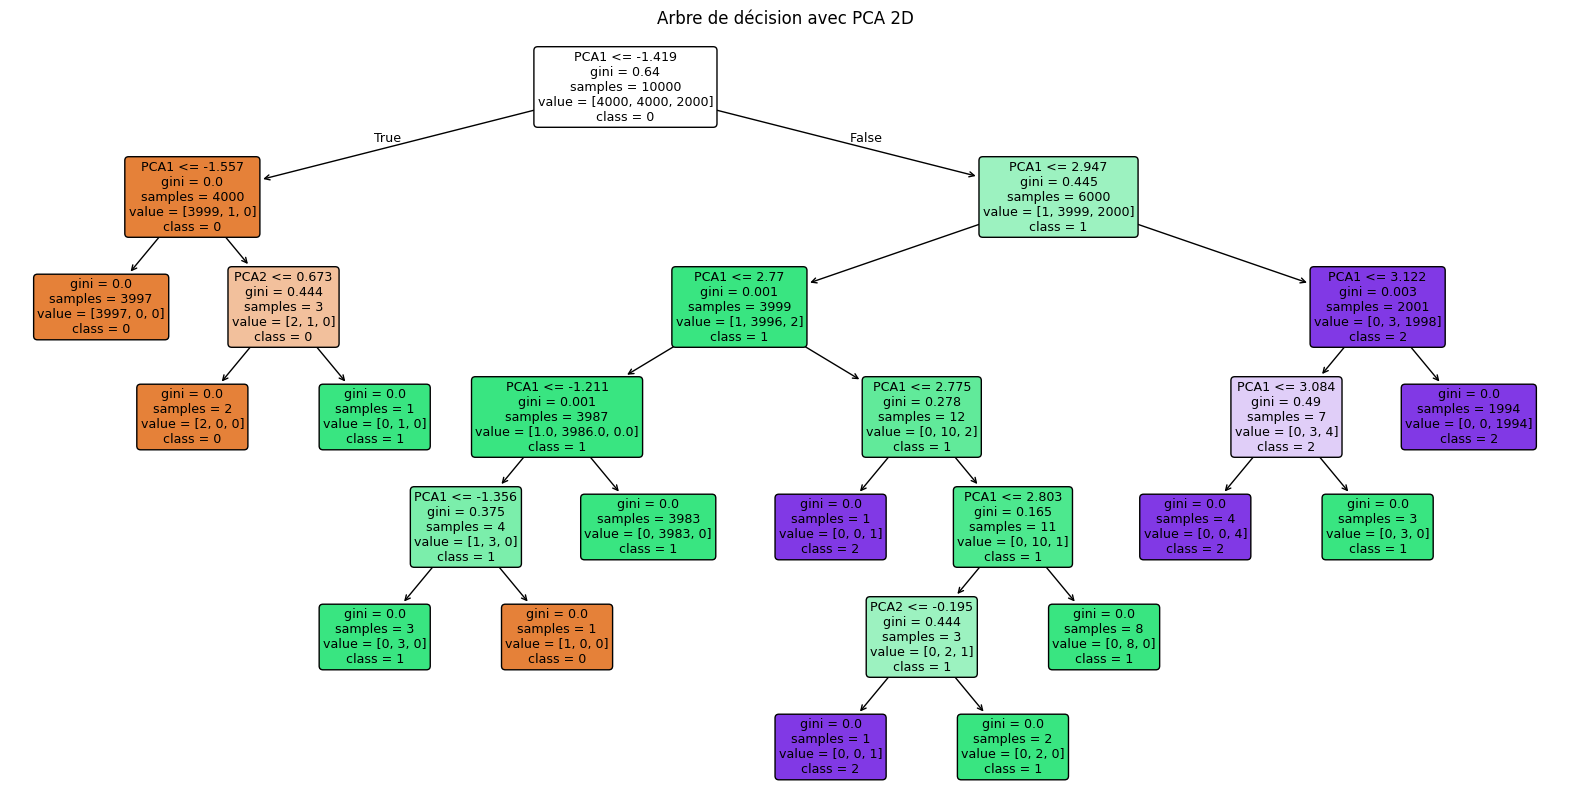

---------------------------------------------------------------------------------------------------------------------------------------


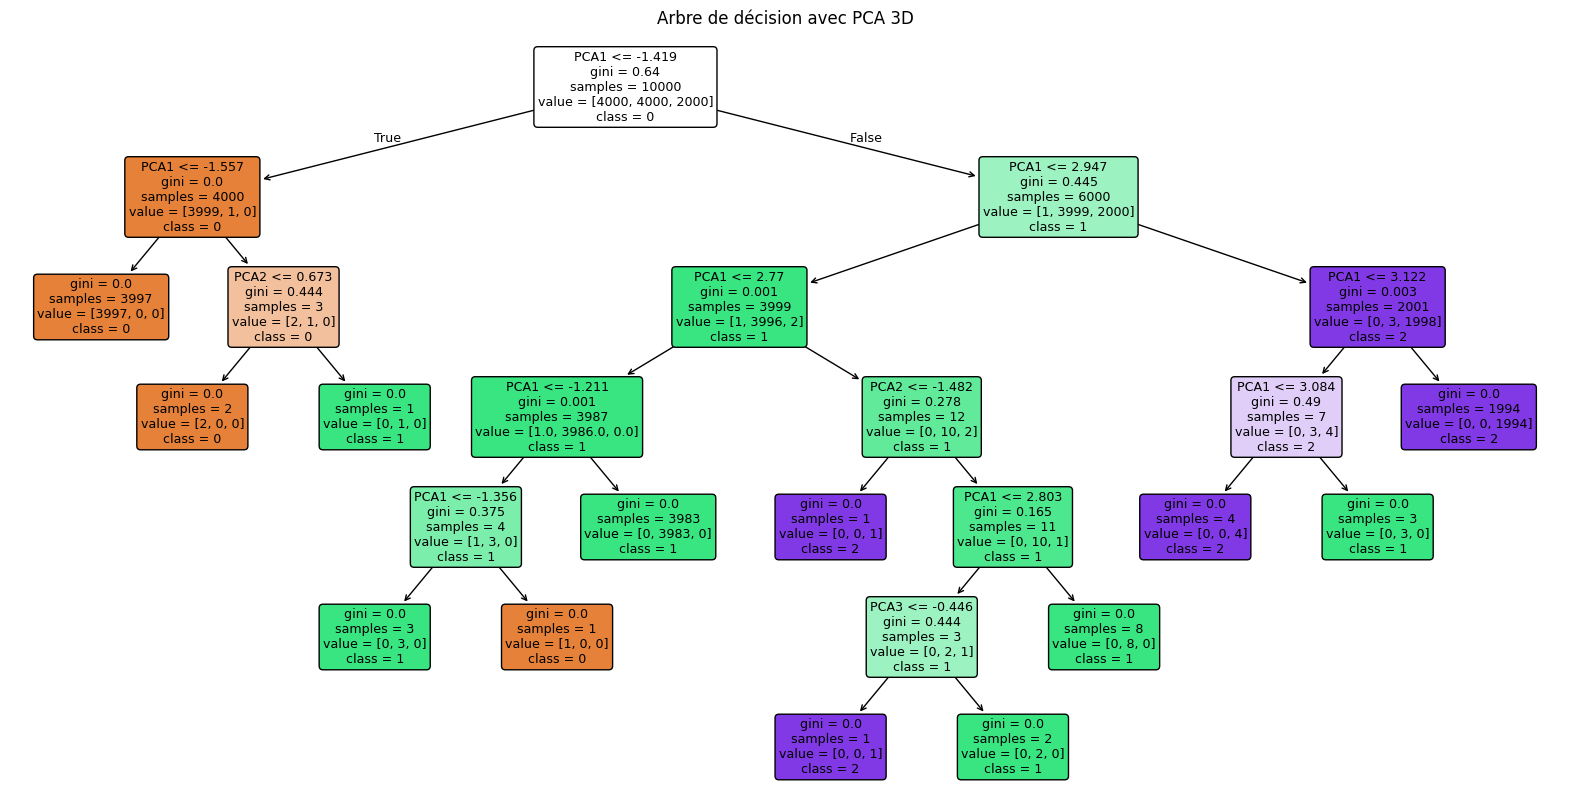

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import des librairies n√©cessaires pour l'arbre de d√©cision

clf_2d = DecisionTreeClassifier(random_state=42)  # Cr√©ation d'un mod√®le d'arbre de d√©cision pour la PCA 2D
clf_2d.fit(X_pca_2d, y)  # Entra√Ænement du mod√®le avec la PCA_2D

plt.figure(figsize=(20, 10))  # D√©finition de la taille du graphique
plot_tree(clf_2d, filled=True, feature_names=['PCA1', 'PCA2'], class_names=[str(c) for c in set(y)], rounded=True)  # Affichage de l'arbre de d√©cision avec PCA 2D

plt.title("Arbre de d√©cision avec PCA 2D")  # Ajout d'un titre au graphique
plt.show()  # Affichage de l'arbre de d√©cision

print("---------------------------------------------------------------------------------------------------------------------------------------")

clf_3d = DecisionTreeClassifier(random_state=42)  # Cr√©ation d'un mod√®le d'arbre de d√©cision pour la PCA 3D
clf_3d.fit(X_pca_3d, y)  # Entra√Ænement du mod√®le avec la PCA_3D

plt.figure(figsize=(20, 10))  # D√©finition de la taille du graphique
plot_tree(clf_3d, filled=True, feature_names=['PCA1', 'PCA2', 'PCA3'], class_names=[str(c) for c in set(y)], rounded=True)  # Affichage de l'arbre de d√©cision avec PCA 3D
plt.title("Arbre de d√©cision avec PCA 3D")  # Ajout d'un titre au graphique
plt.show()  # Affichage de l'arbre de d√©cision



üòØ Nous obtenons le m√™me arbre de d√©cision, car dans les donn√©es principales, il n‚Äôy a pas assez de bruit, ce qui lui permet de distinguer parfaitement les donn√©es entre elles.

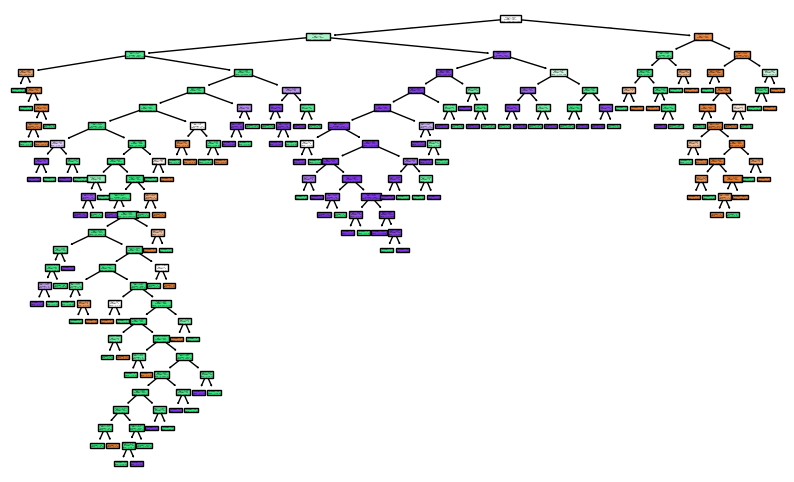

In [ ]:
X = df_scaled_dataframe.iloc[:, :-1] #Nous retirons la derni√®re colonne
y = df_scaled_dataframe.iloc[:, -1]  # S√©lectionne uniquement la derni√®re colonne
model = DecisionTreeClassifier() #classificateur => un arbre de d√©cision
model.fit(X, y) # Entra√Æne le mod√®le sur les donn√©es X et y


plt.figure(figsize=(10, 6)) #la taille du graphique
plot_tree(model, filled=True)  #l'arbre de d√©cision avec les n≈ìuds color√©s
plt.show() #Affichage

In [ ]:
import numpy as np

# verfication de verifier si cela est normal de avoir deux fois le m√™me abre de d√©cision demander a chatgpt
explained_variance = np.var(X_pca_3d, axis=0) / np.var(X_pca_3d, axis=0).sum()
print("Variance expliqu√©e par chaque composante :", explained_variance)



Variance expliqu√©e par chaque composante : [0.84918462 0.07970878 0.0711066 ]


Nous avons fait un calcul pour d√©montrer de mani√®re math√©matique la raison de l‚Äôaccuracy √† 100 %, et cela vient du fait que la troisi√®me composante de la PCA apporte une quantit√© minime d‚Äôinformation.